<a href="https://colab.research.google.com/github/NazmulMahadi/Automatic-Medicine-Reminder-Using-Arduino./blob/main/update_of_Copy_of_Untitled7_10_july.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras


In [ ]:
!pip install tensorflow

In [ ]:
!pip install backend

  Created wheel for backend: filename=backend-0.2.4.1-cp37-none-any.whl size=6664 sha256=f19ff08238bde62bc159f22b328e9dcb6f92a007acaf20f92cd974e289ba820e
  Stored in directory: /root/.cache/pip/wheels/cb/b8/0d/ee02b0ffdc49f543de4e10d70847ea4d672922f85b2aef8efe
Successfully built backend


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install SpeechRecognition

In [ ]:
!pip install gTTS

In [ ]:
!pip install PyAudio

  Using cached https://files.pythonhosted.org/packages/ab/42/b4f04721c5c5bfc196ce156b3c768998ef8c0ae3654ed29ea5020c749a6b/PyAudio-0.2.11.tar.gz
  ERROR: Failed building wheel for PyAudio
  Running setup.py clean for PyAudio
Failed to build PyAudio
    Running setup.py install for PyAudio ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-m4n8fta8/PyAudio/setup.py'"'"'; __file__='"'"'/tmp/pip-install-m4n8fta8/PyAudio/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-b6w8pnuj/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [ ]:
!pip install ffmpeg-python

In [ ]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

In [ ]:
audio, sr = get_audio()


In [ ]:
import matplotlib.pyplot as plt

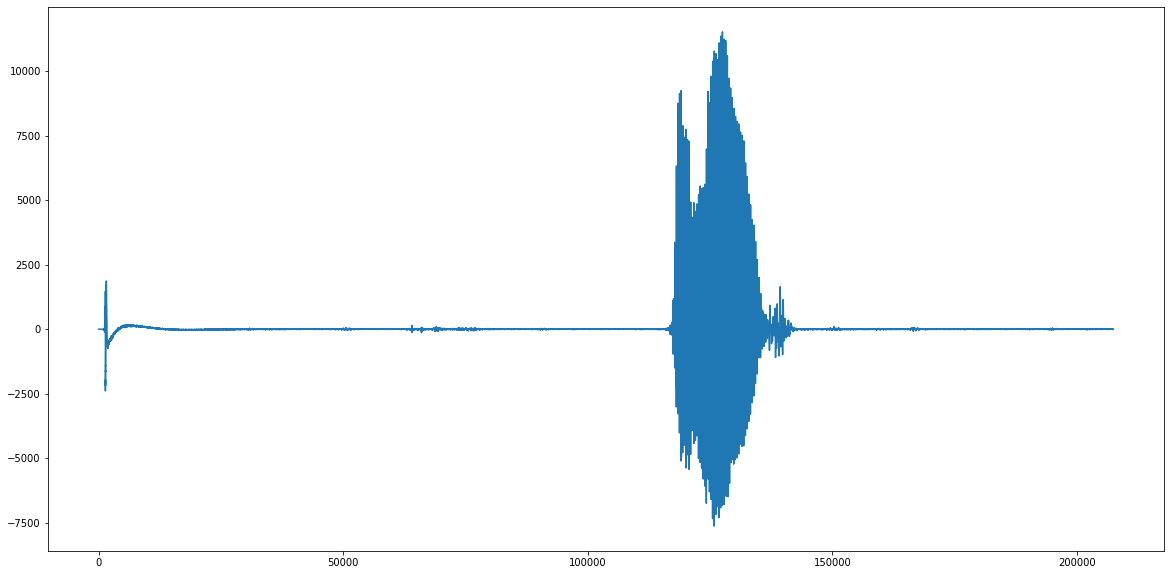

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(audio)
plt.show()

In [ ]:
!pip install rasa==1.10.3

     |████████████████████████████████| 512kB 11.4MB/s 
     |████████████████████████████████| 81kB 7.4MB/s 
     |████████████████████████████████| 993kB 29.2MB/s 
     |████████████████████████████████| 61kB 5.5MB/s 
     |████████████████████████████████| 81kB 7.3MB/s 
     |████████████████████████████████| 61kB 5.5MB/s 
     |████████████████████████████████| 378kB 60.9MB/s 
     |████████████████████████████████| 512kB 51.5MB/s 
     |████████████████████████████████| 61kB 5.2MB/s 
     |████████████████████████████████| 1.3MB 49.5MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
     |████████████████████████████████| 3.2MB 47.2MB/s 
     |████████████████████████████████| 153kB 57.4MB/s 
     |████████████████████████████████| 1.2MB 44.4MB/s 
     |████████████████████████████████| 102kB 8.2MB/s 
     |████████████████████████████████| 184kB 60.6MB/s 
     |████████████████████████████████| 983kB 47.2MB/s 
     |████████████████████████████████| 112kB 57.9MB/s 
     

In [ ]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
!pip install nest_asyncio==1.3.3

ERROR: nbclient 0.5.3 has requirement jupyter-client>=6.1.5, but you'll have jupyter-client 5.3.5 which is incompatible.
  Found existing installation: nest-asyncio 1.5.1
    Uninstalling nest-asyncio-1.5.1:
      Successfully uninstalled nest-asyncio-1.5.1


In [ ]:
import os 

In [ ]:
import rasa
import nest_asyncio
nest_asyncio.apply()
print("Event run")

Event run


In [ ]:
from rasa.cli.scaffold import create_initial_project

In [ ]:
project = 'test_project'
create_initial_project(project)

In [ ]:
os.chdir(project)
print(os.listdir("."))

['__init__.py', 'domain.yml', 'data', 'config.yml', 'credentials.yml', 'endpoints.yml', 'tests', 'actions.py', '__pycache__']


In [ ]:
config = "config.yml"
training_files = "data/"
domain = "domain.yml"
output = "models/"
print(config, training_files, domain, output)

config.yml data/ domain.yml models/


In [ ]:
model_path = rasa.train(domain, config, [training_files], output)
print(model_path)

Training Core model...


Processed trackers: 100%|██████████| 5/5 [00:00<00:00, 62.39it/s, # actions=16]
Processed actions: 16it [00:00, 724.51it/s, # examples=16]
Processed trackers: 100%|██████████| 231/231 [00:07<00:00, 30.59it/s, # actions=126]


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'g

Epochs:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/rasa/utils/tensorflow/model_data.py:386: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  final_data[k].append(np.concatenate(np.array(v)))
Epochs: 100%|██████████| 100/100 [00:13<00:00,  7.53it/s, t_loss=0.075, loss=0.004, acc=1.000]


Core model training completed.
Training NLU model...
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOS

/usr/local/lib/python3.7/dist-packages/rasa/utils/common.py:363: UserWarning: You specified 'DIET' to train entities, but no entities are present in the training data. Skip training of entities.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'g

Epochs:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/rasa/utils/tensorflow/model_data.py:386: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  final_data[k].append(np.concatenate(np.array(v)))
Epochs: 100%|██████████| 100/100 [00:14<00:00,  6.74it/s, t_loss=1.942, i_loss=0.552, i_acc=0.977]


NLU model training completed.
Your Rasa model is trained and saved at '/content/test_project/models/20210703-112737.tar.gz'.
models/20210703-112737.tar.gz


In [ ]:
from rasa.jupyter import chat

endpoints = 'endpoints.yml'

chat(model_path, endpoints)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'g

Did that help you?
yes
Great, carry on!
ok
Bye
bye
Bye
/stop


In [ ]:
chat(model_path, endpoints)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'g

In [ ]:
%%writefile data/nlu.md

## intent:Sadness
- Do you feel sad ?
- Do you feel sad much of the time?
- Do you feel sad all the time?
- Do you feel so sad or unhappy that you can not stand?

## intent:Pessimism
- Are you discouraged about your future?
- Do you feel more discouraged about your future than you used to?
- Do you feel your future is hopeless and will get worse?

## intent:Past_failure
- Do you feel like a failure?
- Have you fail more time than you should?
- Do you see a lot of failure when you look back?
- Do you feel your future is hopeless and will only get worse ?

## intent:Loss_of_Pleasure
- Do you get as much as pleasure from the things you enjoyed? 
- Do you get pleasure as much as you used to enjoy?
- Can you get any pleasure as much as you used to enjoy?

## intent:Guilty_Feelings
- Do you feel particular guilty?
- Do you feel guilty over many things you have done or should have done?
- Do you feel quite guilty most of the time?
- Do you feel guilty all of the time?

## intent:Punishment_Feelings 
- Do you not feel you are being punished?
- Do you feel you may be punished?
- Do you expect to be punished?
- Do you feel you are being punished?

## intent:Self_Dislike
- Do feel the same about yourself as ever?
- Have ou lost confidence in yourself?
- Are you disappoint in yourself?
- Do you dislike yourself?

## intent:Self_Criticalness
-  Do you not criticize or blame yourself more than usual?
- Are you more critical of yourself than you used to be?
- Do you criticize yourself for all of your faults? 
- Do you blame yourself for everything bad that happens?

## intent:Suicidal_Thoughts_or_Wishes
- Do you have any thoughts of killing yourself.
- Have you thoughts of killing yourself, but you would not carry them out?
- Would you like to kill yourself?
- Would You kill yourself if you had the chance?

## intent:Crying
- Do you not cry more than I used to?
- Do you cry more than I used to? 
- Do you cry over every little thing?
- Do you feel like crying, but you can not?

## intent:Agitation
- Do you feel no more restless or wound up than usual?
- Do you feel more restless or wound up than usual?
- Do you feel so restless or agitated, it is hard to stay still?
- Do you feel restless or agitated that you have to keep moving or doing something?

## intent:Loss_of_Interest
- Have you lost interest in other people or activities?
- Are you less interested in other people or things than before?
- Have you lost most of your interest in other people or things?
- Is it hard to get interested in anything?

## intent:Indecisiveness
- Do you make decisions about as well as ever?
- Do you find it more difficult to make decisions than usual?
- Do you feel greater difficulty in making decisions than you used to?
- Do you have trouble making any decisions?

## intent:Worthlessness
- Do feel I am worthless?
- Do you consider yourself as worthwhile and useful as you used to?
- Do you feel more worthless as compared to others?
- Do you feel utterly worthless?

## intent:Loss_of_Energy
- Do you have as much energy as ever?
- Do have less energy than I used to have?
- Do you have enough energy to do very much?
- Do you have enough energy to do anything?

## intent: Changes_in_Sleeping_Pattern
- Have you experienced any change in your sleeping?
- Do you sleep somewhat more than usual?
- Do you sleep a lot more than usual? 
- Do you sleep a lot less than usual?
- Do you sleep most of the day?

## intent:Irritability
- Do you feel not more irritable than usual?
- Do you feel more irritable than usual?
- Do you feel much more irritable than usual?
- Do you feelirritable all the time?

## intent:Changes_in_Appetite
- Have you experienced any change in my appetite?
- Is your appetite somewhat less than usual? 
- Is your appetite somewhat greater than usual? 
- Is your appetite much less than before?
- Is your appetite much greater than before?
- Have you any appetite at all?

## intent:Concentration_Difficulty
-  Can you concentrate as well as ever?
-  Can you not concentrate as well as usual?
-  Is it hard to keep your mind on anything for very long?
-  Do you feel you can not concentrate on anything?

## intent:Tiredness_or_Fatigue
- Do you get more tired or fatigued than usual?
- Do you get more tired or fatigued more easily than usual?
- Are you too tired or fatigued to do a lot of the things I used to do? 
- Are you too tired or fatigued to do most of the things I used to do?

## intent:greet
- hey
- hello
- hi
- good morning
- good evening
- hey there

## intent:goodbye
- bye
- goodbye
- see you around
- see you later

## intent:affirm
- yes
- indeed
- of course
- that sounds good
- correct

## intent:deny
- no
- never
- I don't think so
- don't like that
- no way
- not really

## intent:mood_great
- perfect
- very good
- great
- amazing
- wonderful
- I am feeling very good
- I am great
- I'm good

## intent:mood_unhappy
- sad
- very sad
- unhappy
- bad
- very bad
- awful
- terrible
- not very good
- extremely sad
- so sad

## intent:bot_challenge
- are you a bot?
- are you a human?
- am I talking to a bot?
- am I talking to a human?

Overwriting data/nlu.md


In [ ]:
%%writefile domain.yml

intents:
  - greet
  - goodbye
  - affirm
  - deny
  - mood_great
  - mood_unhappy
  - bot_challenge
  - Sadness
  - Pessimism
  - Past_Failure
  - Loss_of_Pleasure
  - Guilty_Feelings
  - Punishment_Feelings
  - Self_Dislike
  - Self_Criticalness
  - Suicidal_Thoughts_or_Wishes
  - Crying 
  - Agitation
  - Loss_of_Interest
  - Indecisiveness 
  - Worthlessness
  - Loss_of_Energy
  - Changes_in_Sleeping_Pattern
  - Irritability
  - Changes_in_Appetite
  - Concentration_Difficulty
  - Tiredness_or_Fatigue

responses:

  utter_Sadness:
  - text: "What do you feel about sadness :"
  
    -buttons:"I do not feel sad"
     payload:"/Sadness"
     -buttons:"I feel sad much of the time"
     payload:"/Sadness"
     -buttons:"I am sad all the time"
     payload:"/Sadness"
     -buttons:"I am so sad or unhappy that I cannot stand it"
     payload:"/Sadness"


  utter_Past_failure:
  - text: "Do you feel like a failure :"
  
    -buttons:"I do not feel like a failure."
     payload:"/Past_failure"
     -buttons:"I have failed more than I should have"
     payload:"/Past_failure"
     -buttons:"As I look back, I see a lot of failures"
     payload:"/Past_failure"
     -buttons:"I feel I am a total failure as a person."
     payload:"/Past_failure""


  utter_Guilty_feelings:
  - text: "Tell me about your guilty feelings :"
  
    -buttons:"I don't feel particularly guilty"
     payload:"/Guilty_feelings"
     -buttons:"I feel guilty over many things I have done or should have done"
     payload:"/Guilty_feelings"
     -buttons:"I feel quite guilty most of the time"
     payload:"/Guilty_feelings"
     -buttons:"I feel guilty all of the time."
     payload:"/Guilty_feelings"

   utter_Self_dislike:
  - text: "What do you feel about self dislike :"
  
    -buttons:"I feel the same about myself as ever."
     payload:"/Self_dislike"
     -buttons:"I have lost confidence in myself."
     payload:"/Self_dislike"
     -buttons:"I am disappointed in myself."
     payload:"/Self_dislike"
     -buttons:"I dislike myself."
     payload:"/Self_dislike"



utter_Suicidal_thoughts_or_wishes:
  - text: "Do you have any Suicidal_thoughts_or_wishes :"
  
    -buttons:"I don't have any thoughts of killing myself."
     payload:"/Suicidal_thoughts_or_wishes"
     -buttons:"I have thoughts of killing myself, but I would not carry them out."
     payload:"/Suicidal_thoughts_or_wishes"
     -buttons:"I would like to kill myself."
     payload:"/Suicidal_thoughts_or_wishes"
     -buttons:"I would kill myself if I had the chance."
     payload:"/Suicidal_thoughts_or_wishes."

  utter_Agitation:
  - text: "Tell me about your agitational state:"
  
    -buttons:"I am no more restless or wound up than usual."
     payload:"/Agitation"
     -buttons:"I feel more restless or wound up than usual."
     payload:"/Agitation"
     -buttons:"I am so restless or agitated, it's hard to stay still"
     payload:"/Agitation"
     -buttons:"I am so restless or agitated that I have to keep moving or doing something."
     payload:"/Agitation"
 
 utter_Indecisiveness:
  - text: "Are you going through indecisiveness:"
  
    -buttons:"I make decisions about as well as ever."
     payload:"/Indecisiveness"
     -buttons:"I find it more difficult to make decisions than usual."
     payload:"/Indecisiveness"
     -buttons:"I have much greater difficulty in making decisions than I used to."
     payload:"/Indecisiveness"
     -buttons:"I have trouble making any decisions."
     payload:"/Indecisiveness"
 
  
 utter_Loss_of_energy:
  - text: "Are you feeling like you are losing your energy:"
  
    -buttons:"I have as much energy as ever."
     payload:"/Loss_of_energy"
     -buttons:"I have less energy than I used to have."
     payload:"/Loss_of_energy"
     -buttons:"I don't have enough energy to do very much."
     payload:"/Loss_of_energy"
     -buttons:"I don't have enough energy to do anything."
     payload:"/Loss_of_energy"


 utter_Irritability:
  - text: "Are you feeling like you are becoming irritabile:"
  
    -buttons:"I am not more irritable than usual"
     payload:"/Irritability"
     -buttons:"I am more irritable than usual."
     payload:"/Irritability"
     -buttons:"I am much more irritable than usual."
     payload:"/Irritability"
     -buttons:"I am irritable all the time."
     payload:"/Irritability"


 utter_Tiredness_or_fatigue:
  - text: "Are you feeling tired:"
  
    -buttons:"I am no more tired or fatigued than usual"
     payload:"/Tiredness_or_fatigue"
     -buttons:"I get more tired or fatigued more easily than usual."
     payload:"/Tiredness_or_fatigue"
     -buttons:"I am too tired or fatigued to do a lot of the things I used to do."
     payload:"/Tiredness_or_fatigue"
     -buttons:"I am too tired or fatigued to do most of the things I used to do."
     payload:"/Tiredness_or_fatigue."


  utter_deluxe:
  - text:" You have choosen to book a Deluxe rooms"

  utter_simple:
  - text: "You have choosen to book a sample rooms."

  utter_num_room:
  - text: "what type of room would you want to book - simple room or Deluxe room ?"

  utter_book_room:
  - text: "How many room would you like to book?"

  utter_greet:
  - text: "Hey! How may i help you?"

  utter_cheer_up:
  - text: "Here is something to cheer you up:"
    image: "https://i.imgur.com/nGF1K8f.jpg"

  utter_did_that_help:
  - text: "Did that help you?"

  utter_happy:
  - text: "Great, carry on!"

  utter_goodbye:
  - text: "Bye"

  utter_iamabot:
  - text: "I am a bot, powered by Rasa."

entities:
  - number

session_config:
  session_expiration_time: 60
  carry_over_slots_to_new_session: true

Overwriting domain.yml


In [ ]:
%%writefile data/stories.md

## check in
* greet
  - utter_greet
* check_in
  - utter_check_in

## check out
* greet
  - utter_greet
* check_out
  - utter_check_out

## cancel reservation
* greet
  - utter_greet
* cancel_resr
  - utter_cancel_resr

## policy
* greet
  - utter_greet
* can_policy
  - utter_can_policy

## Restaurant details
* greet
  - utter_greet
* restaurant
  - utter_restaurant

## break fast
* greet
  - utter_greet
* breakfast
  - utter_breakfast

## break time
* greet
  - utter_greet
* break_time
  - utter_break_time

## rest time
* greet
  - utter_greet
* rest_time
  - utter_rest_time

## clean_room
* greet
  - utter_greet
* clean
  - utter_clean
* clean_now
  - utter_clean_now

## book_simple_room
* greet
  - utter_greet
* book_room
  - utter_book_room
* num_room
  - utter_num_room
* simple 
  - utter_simple

## book_deluxe_room
* greet
  - utter_greet
* book_room
  - utter_book_room
* num_room
  - utter_num_room
* deluxe
  - utter_deluxe

## happy path
* greet
  - utter_greet
* mood_great
  - utter_happy

## sad path 1
* greet
  - utter_greet
* mood_unhappy
  - utter_cheer_up
  - utter_did_that_help
* affirm
  - utter_happy

## sad path 2
* greet
  - utter_greet
* mood_unhappy
  - utter_cheer_up
  - utter_did_that_help
* deny
  - utter_goodbye

## say goodbye
* goodbye
  - utter_goodbye

## bot challenge
* bot_challenge
  - utter_iamabot

Overwriting data/stories.md


In [ ]:
model_path =  rasa.train(domain, config, [training_files], output)
print(model_path)

/usr/local/lib/python3.7/dist-packages/rasa/core/domain.py:137: FutureWarning: Templates should not be strings anymore. Utterance template 'utter_clean_now' should contain either a '- text: ' or a '- custom: ' attribute to be a proper template.
  utter_templates = cls.collect_templates(data.get("responses", {}))
/usr/local/lib/python3.7/dist-packages/rasa/core/domain.py:137: FutureWarning: Templates should not be strings anymore. Utterance template 'utter_clean' should contain either a '- text: ' or a '- custom: ' attribute to be a proper template.
  utter_templates = cls.collect_templates(data.get("responses", {}))
/usr/local/lib/python3.7/dist-packages/rasa/core/domain.py:137: FutureWarning: Templates should not be strings anymore. Utterance template 'utter_deluxe' should contain either a '- text: ' or a '- custom: ' attribute to be a proper template.
  utter_templates = cls.collect_templates(data.get("responses", {}))
Processed Story Blocks:   0%|          | 0/16 [00:00<?, ?it/s, # 

Training Core model...


Processed trackers: 100%|██████████| 16/16 [00:00<00:00, 167.70it/s, # actions=44]
Processed actions: 44it [00:00, 879.90it/s, # examples=44]
Processed trackers: 100%|██████████| 516/516 [00:17<00:00, 29.41it/s, # actions=506]


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'g

Epochs:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/rasa/utils/tensorflow/model_data.py:386: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  final_data[k].append(np.concatenate(np.array(v)))
Epochs: 100%|██████████| 100/100 [00:50<00:00,  1.96it/s, t_loss=0.118, loss=0.008, acc=1.000]


Core model training completed.
Training NLU model...
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOS

/usr/local/lib/python3.7/dist-packages/rasa/nlu/classifiers/diet_classifier.py:595: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  for tag_name, tag_ids in tag_name_to_tag_ids.items()


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'g

Epochs:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/rasa/utils/tensorflow/model_data.py:386: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  final_data[k].append(np.concatenate(np.array(v)))
Epochs: 100%|██████████| 100/100 [00:40<00:00,  2.45it/s, t_loss=2.731, i_loss=1.023, entity_loss=0.009, i_acc=0.982, entity_f1=0.922]


NLU model training completed.
Your Rasa model is trained and saved at '/content/test_project/models/20210703-113600.tar.gz'.
models/20210703-113600.tar.gz


In [ ]:
endpoints = "endpoints.yml"
chat(model_path, endpoints)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Instructions for updating:
Use tf.identity instead.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOG

In [ ]:
chat(model_path, endpoints)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Caus

In [ ]:
import rasa.data as data

stories_directory, nlu_data_directory = data.get_core_nlu_directories(training_files)

print(stories_directory, nlu_data_directory)

/tmp/tmpx3y7t3wu /tmp/tmpejrhvehe


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'g

100%|██████████| 16/16 [00:00<00:00, 70.68it/s]


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Caus

100%|██████████| 109/109 [00:01<00:00, 82.20it/s]


Done testing...


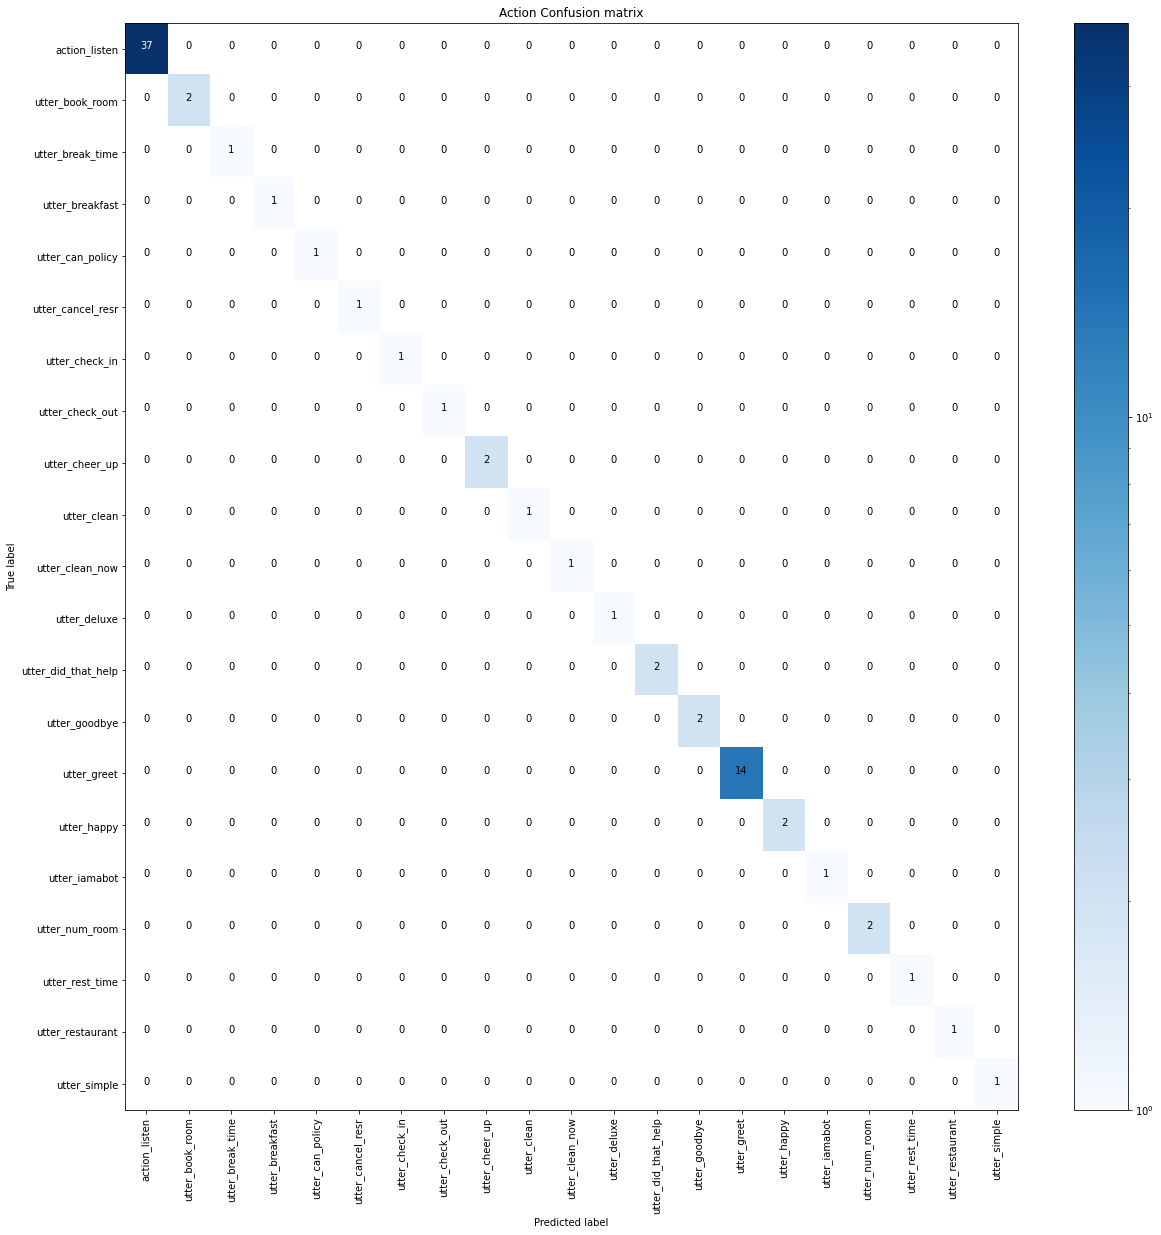

In [ ]:
rasa.test(model_path, stories_directory, nlu_data_directory)

print("Done testing...")